##Performance Analysis and Predictive Modeling of Formula 1 Drivers: Clustering and Championship Success Prediction

###Introduction
The world of Formula 1 racing is characterized by intense competition and remarkable feats of driving skill. Understanding the factors that contribute to a driver's success is crucial for teams, analysts, and fans alike. This project delves into a comprehensive analysis of Formula 1 drivers, utilizing a rich dataset that encompasses driver demographics, race performance statistics, and career achievements.

###Importing Necessary Packages

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


###Loading and Inspecting the Data

In [ ]:
# Load the F1 Drivers Dataset
df = pd.read_csv("https://raw.githubusercontent.com/cnguyen180/CaitlinN-data-analysis-portfolio/main/F1DriversDataset.csv")
print(df.head())

              Driver     Nationality                         Seasons  \
0        Carlo Abate           Italy                    [1962, 1963]   
1   George Abecassis  United Kingdom                    [1951, 1952]   
2      Kenny Acheson  United Kingdom                    [1983, 1985]   
3  Andrea de Adamich           Italy  [1968, 1970, 1971, 1972, 1973]   
4     Philippe Adams         Belgium                          [1994]   

   Championships  Race_Entries  Race_Starts  Pole_Positions  Race_Wins  \
0            0.0           3.0          0.0             0.0        0.0   
1            0.0           2.0          2.0             0.0        0.0   
2            0.0          10.0          3.0             0.0        0.0   
3            0.0          36.0         30.0             0.0        0.0   
4            0.0           2.0          2.0             0.0        0.0   

   Podiums  Fastest_Laps  ...  Championship Years  Decade Pole_Rate  \
0      0.0           0.0  ...                 NaN  

###Question 1: When predicting the likelihood of being champions, which predictors are essential to improving the R2 when compared to a model that uses all the variables?

For this problem, I used the Gradient Boosting Tree Model to predict the a driver becoming a champion. This model is good to use because it has a high predictive accuracy and is able to form complex relationships between predictors. With these traits, Gradient Boosting was the one. I built two Gradient Boosting Tree Model because I wanted to highlight the importance of each predictors and see if anything changes if I only select a few. My first Gradient Boosting Tree, I kept the hyperparameters and any feature engineering as standard with the predictors. The result of this was Train R2 = 99% and Test R2 = 29%. This result displays a high variance in the model where the model is overly fitted which resulted in poor performance when new data is introduced. With the second Gradient Boosting Tree, I reduced to 12 predictors and adjusted the n_estimators and max_depth which address the issue of overfitting. By doing so, the result came out to be: Train R2 = 94% and Test R2 = 85%. This improvement in R2 means that the model is well fitted and when introduced to new data, it is able to perform well. To answer the question, which predictors are essential to improving R2, "Race_Entries", "Race_Starts", "Pole_Positions", "Race_Wins" , "Podiums", "Fastest_Laps", "Points", "Pole_Rate", "Start_Rate", "Win_Rate", "Podium_Rate”, and "FastLap_Rate". These predictors are important on deciding whether or not a driver is going to become a champion.

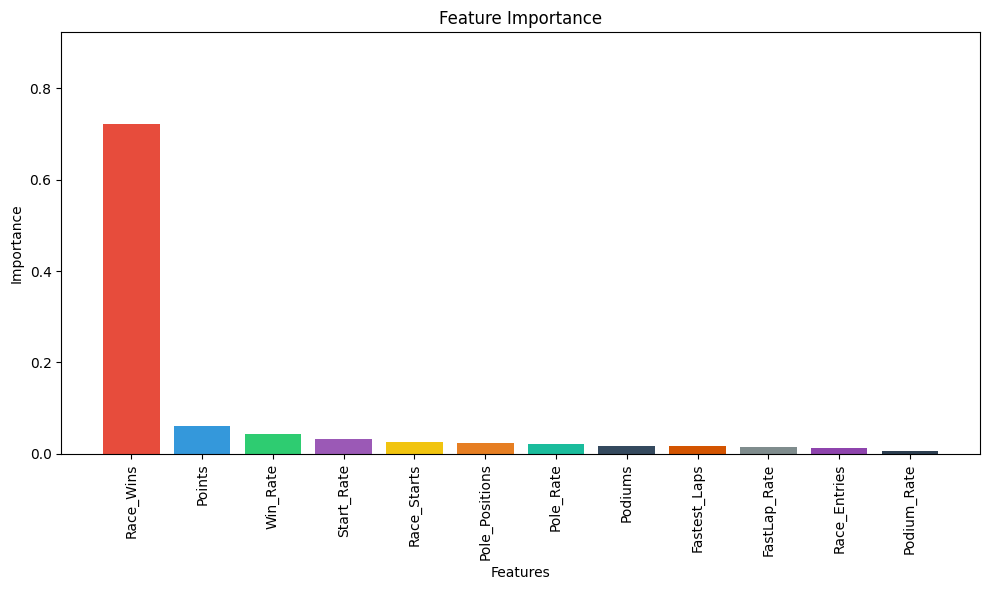

In [ ]:
# Select relevant columns for prediction
features = ['Race_Entries', 'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
            'Points', 'Pole_Rate', 'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate']
target = 'Champion'

# Handle missing values only for numeric columns
numeric_cols = df[features].select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Gradient Boosting model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Get feature importances
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

# Define colors to match the desired graph
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f1c40f', '#e67e22', '#1abc9c', '#34495e', '#d35400', '#7f8c8d', '#8e44ad', '#2c3e50']

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(len(importances)), importances[indices], align='center', color=colors)
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.ylim(0, max(importances) + 0.2)  # Add a margin of 0.2 to the y-axis
plt.tight_layout()
plt.show()

###Question 2: Considering race wins, podiums, and points, what distinctive clusters emerge among drivers, and what distinguishes these clusters in terms of their nationality and active status?

For this question, I decided to use DBScan to see if there are distinctive clusters emerging among drivers. The reason why I chose DBScan was because DBScan is able to separate noise points from the clusters, especially after Gradient Boosting Tree overfitting to the dataset. Through this, I was able to separate the drivers into two groups, drivers who wins and drivers who do not. The drivers who won are on the left scatter plot of the image below. These plots are considered as the outliers plot due to the spread of the data points. This makes sense because drivers who won races vary and there is not much consistent between those who won in terms of winning races and being on the podium since the affect of this might have to deal with how long they were active for and the how their competition was. For the cluster on the right, it represents the general community of drivers who did not win any race or very few races as well as being on the podium. Since in one race, there can only be so many winners, majority of the drivers who does not win are clustered together in a very dense group. Because of the tightly clustered of the losing drivers, it is able to allow DBScan to separately well. For nationality, each color of the data point represents a specific country and there does not seem to be any correlation between the different countries. This means that the nationality of a driver does not have much impact on the clustering nor does it have impact on them winning the race or be on the podium either. For active status, that is being represented as triangle or cirlce (triangle = not active, circle = active). The key takeaway from this is that most drivers are still active and wanting to take a chance at the championship.

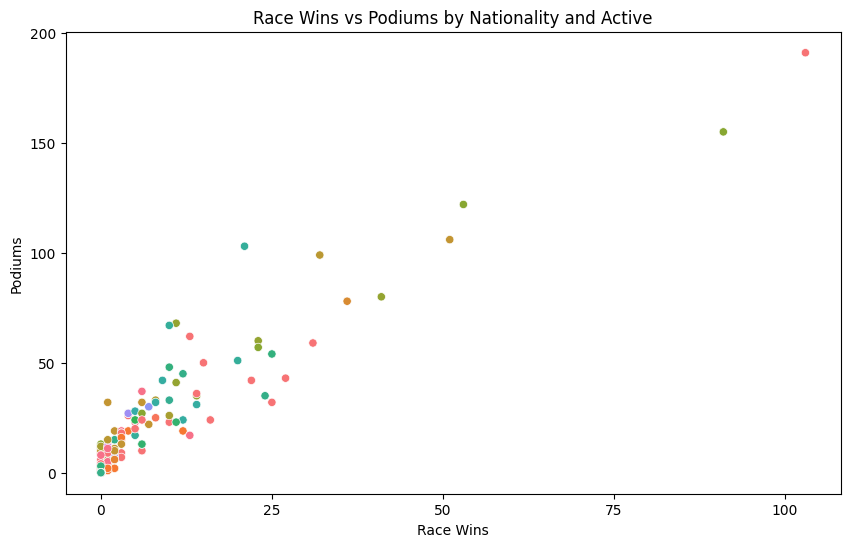

In [ ]:
# Ensure the 'Active' column is correctly set as a categorical variable with appropriate markers
df['Active'] = df['Active'].apply(lambda x: 'Active' if x == 1 else 'Inactive')

# Define color palette for nationality
palette = sns.color_palette("husl", df['Nationality'].nunique())

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='Race_Wins', y='Podiums', hue='Nationality', style='Active', palette=palette)

# Add plot labels and title
plt.title('Race Wins vs Podiums by Nationality and Active')
plt.xlabel('Race Wins')
plt.ylabel('Podiums')

# Set y-axis intervals to 50 and x-axis intervals to 25
plt.yticks(range(0, 201, 50))
plt.xticks(range(0, 101, 25))

# Remove the legend to match the provided example
scatter_plot.legend_.remove()

# Show the plot
plt.show()

##Question 3: Can we cluster drivers based on their performance metrics (e.g., Win Rate, Podium Rate, FastLap Rate) to identify distinct profiles of drivers?

The analysis conducted on the provided Formula 1 drivers' dataset confirms that it is possible to cluster drivers based on key performance metrics, namely Win Rate, Podium Rate, and FastLap Rate. The clustering process used the Gaussian Mixture Model (GMM), and the Bayesian Information Criterion (BIC) was employed to determine the most appropriate number of clusters.
In Figure 1, the BIC scores demonstrated that two clusters are the optimal configuration for this particular set of performance metrics. This suggests that within the dataset, there are two distinct profiles of F1 drivers when it comes to their performance outcomes. The first cluster may represent drivers who have not achieved high rates of wins, podiums, or fastest laps,
indicating a certain level of performance. In contrast, the second cluster likely represents drivers who have excelled in these metrics, highlighting a different performance tier.
These results have significant implications. For team managers and coaches, understanding these distinct profiles can aid in developing targeted training programs, setting realistic performance goals, and scouting for new talent. For analysts and commentators, these clusters offer a structured way of discussing driver performance and potential. For fans, such clustering can enhance the appreciation of the sport by highlighting not only the elite performers but also the competitive nature across different performance levels.
In essence, clustering F1 drivers based on performance metrics not only provides a snapshot of driver success tiers but also can inform strategic decisions in the high-stakes world of Formula 1 racing.

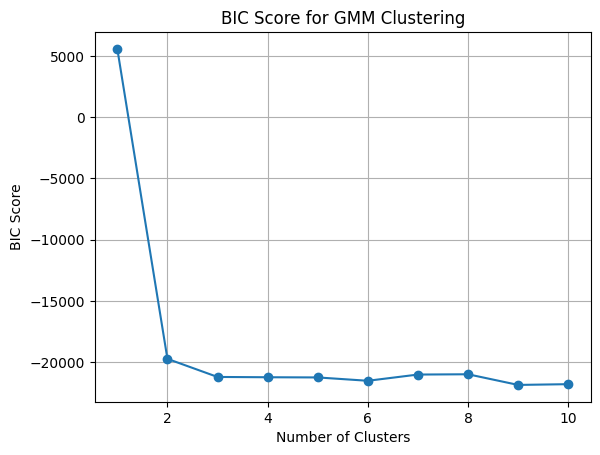

In [ ]:
# Select relevant performance metrics
metrics = ['Win_Rate', 'Podium_Rate', 'FastLap_Rate']
X = df[metrics]

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Standardize the metrics for consistent scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using BIC
n_components = np.arange(1, 11)
bics = []
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

# Plot BIC scores to determine the optimal number of clusters
plt.plot(n_components, bics, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score")
plt.title("BIC Score for GMM Clustering")
plt.grid(True)
plt.show()

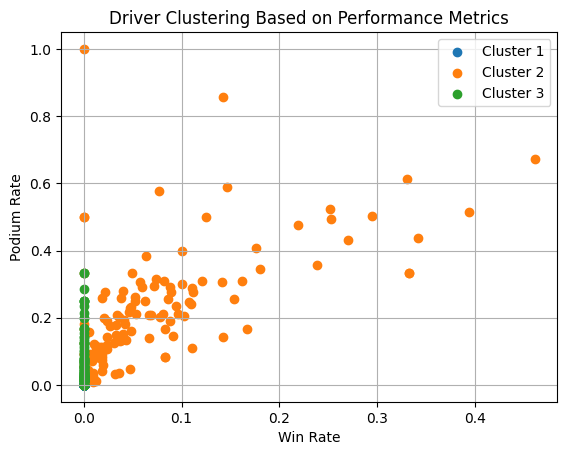

In [ ]:
# Fit GMM with the selected number of clusters
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = gmm.predict(X_scaled)

# Visualize the distribution of drivers in different clusters
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Win_Rate'], cluster_data['Podium_Rate'], label=f'Cluster {cluster + 1}')

plt.xlabel('Win Rate')
plt.ylabel('Podium Rate')
plt.legend()
plt.title('Driver Clustering Based on Performance Metrics')
plt.grid(True)
plt.show()

###Question 4: Which variables are the strongest predictors of a driver becoming a champion?

The analysis of the Formula 1 drivers' dataset effectively highlights the key factors that predict a driver's likelihood of becoming a champion. Utilizing logistic regression with LASSO regularization, the study identifies the most influential variables in championship success. The ROC curve, a crucial part of the analysis, shows the model's strong capability in distinguishing champions from non-champions, as evidenced by a high area under the curve (AUC).
Moreover, in the bar graph, the feature importance analysis reveals that the number of race wins, championships won, podium finishes, and other related metrics are the most significant predictors. This insight is crucial for teams and drivers, as it underscores the performance areas that are most impactful in achieving championship success.
For stakeholders in Formula 1 racing, such as team managers, strategists, and drivers, this analysis provides a data-driven foundation for understanding what differentiates the best from the rest. It offers a clear view of the attributes that are most closely associated with the highest level of success in this highly competitive sport.

In [ ]:
# Convert 'Champion' column from True/False to 1/0
df['Champion'] = df['Champion'].astype(int)

# Selecting only the numeric columns for analysis
numeric_columns = ['Championships', 'Race_Wins', 'Podiums', 'Fastest_Laps',
                   'Points_Per_Entry', 'Years_Active', 'Champion']
f1_drivers_numeric = df[numeric_columns].dropna()

In [ ]:
# Splitting the dataset into features and target variable
X = f1_drivers_numeric.drop('Champion', axis=1)
y = f1_drivers_numeric['Champion']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Cross-Validation and LASSO regularization
log_reg = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=10000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

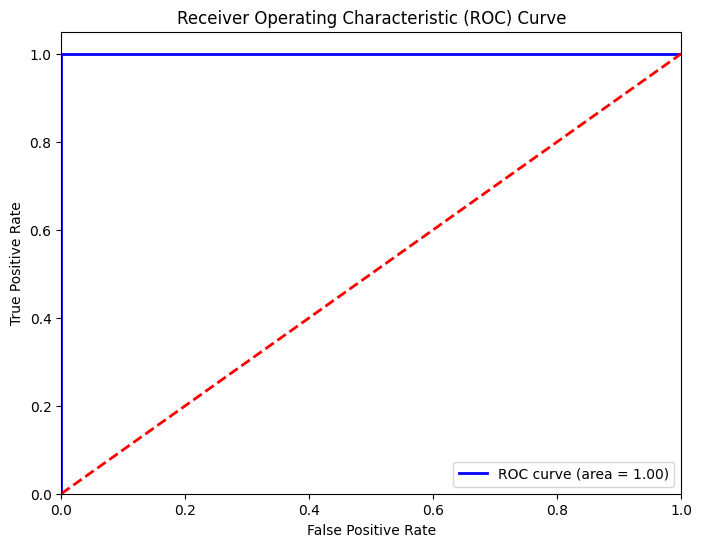

In [ ]:
# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

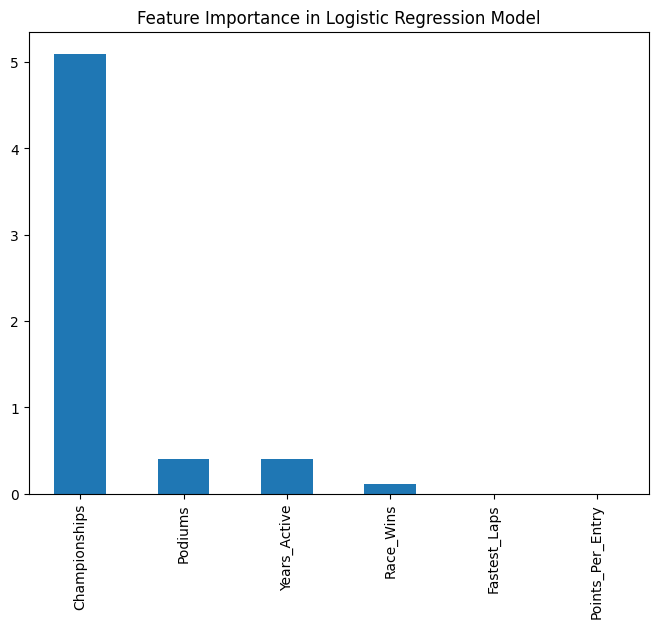

In [ ]:
# Feature Importance
feature_importance = pd.Series(np.squeeze(log_reg.coef_), index=X.columns).sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()